In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

# fetching dataset

In [5]:
file_path="/kaggle/input/poisonous-mushrooms/poisonous_mushrooms.csv"
mushroom=pd.read_csv(file_path)


In [6]:
mushroom.columns


Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

**there are many missing values and strings in first few rows.let's handle it.**

# DATA CLEANING

**#1. handling missing values**

In [7]:
# get the number of missing data points per column
missing_values_count = mushroom.isnull().sum()
print(missing_values_count)


id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


In [8]:
# how many total missing values do we have?
total_cells = np.product(mushroom.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

23.141114719118182


**we have aproximately 23 percent of missing datas**

In [9]:
#lets try with drop the columns with missing values
mushroom.dropna()


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season


In [10]:
#lets now figure out the shape of dataset
# remove all columns with at least one missing value
columns_with_na_dropped = mushroom.dropna(axis=1)
columns_with_na_dropped.head()

,id,class,stem-height,stem-width,season
0,0,e,4.51,15.39,a
1,1,p,4.79,6.48,w
2,2,e,6.85,9.93,w
3,3,e,4.16,6.53,u
4,4,e,3.37,8.36,a


In [11]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % mushroom.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 22 

Columns with na's dropped: 5


**We've lost quite a bit of data, but at this point we have successfully removed all the NaN's from our data. so drop columns is not suited for this data set . lets try labelencoder method**

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in mushroom:
    mushroom[col]=encoder.fit_transform(mushroom[col])


In [18]:
missing_values_count = mushroom.isnull().sum()
print(missing_values_count)


id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


**therefore this method works. there is no missing values in our data set**

**2.removing unwanted column**

In [20]:
#dropping unwanted columns
columns_to_drop=['veil-type']
mr_cleaned=mushroom.drop(columns=columns_to_drop)


In [21]:
#checking data types
print(mr_cleaned.dtypes)

id                      int64
class                   int64
cap-diameter            int64
cap-shape               int64
cap-surface             int64
cap-color               int64
does-bruise-or-bleed    int64
gill-attachment         int64
gill-spacing            int64
gill-color              int64
stem-height             int64
stem-width              int64
stem-root               int64
stem-surface            int64
stem-color              int64
veil-color              int64
has-ring                int64
ring-type               int64
spore-print-color       int64
habitat                 int64
season                  int64
dtype: object


In [23]:
#detecting to remove or transform outliers
q1=mr_cleaned.quantile(0.25)
q3=mr_cleaned.quantile(0.75)
IQR=q3-q1
outliers=(mr_cleaned<(q1-1.5*IQR))|(mr_cleaned>(q3+1.5*IQR))
outlier_percentage=(outliers.sum()/len(mr_cleaned))*100
print(outlier_percentage)

id                       0.000000
class                    0.000000
cap-diameter             2.442392
cap-shape                0.000866
cap-surface              0.000610
cap-color                1.969653
does-bruise-or-bleed    17.555716
gill-attachment          0.000160
gill-spacing             0.000000
gill-color               0.001829
stem-height              4.230585
stem-width               2.092722
stem-root               11.547268
stem-surface            12.986562
stem-color               0.238631
veil-color              12.063030
has-ring                24.001867
ring-type               20.525707
spore-print-color        8.574518
habitat                 11.682336
season                   0.000000
dtype: float64


In [24]:
min_outlier=outlier_percentage.min()
max_outlier=outlier_percentage.max()
print(f"outlier percentage range:{min_outlier:.2f}% to {max_outlier:.2f}%")

outlier percentage range:0.00% to 24.00%


due to the outliers , we use scaling method  for exploratory data analysis

In [25]:
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(mr_cleaned, columns=mr_cleaned.select_dtypes(include=['number']).columns)



# EXPLORATORY DATA ANALYSIS

1.summary statistics

In [30]:
#view unique values in each column:
unique=scaled_data.nunique()
print(unique)

id                      3116945
class                         2
cap-diameter               3914
cap-shape                    75
cap-surface                  84
cap-color                    79
does-bruise-or-bleed         27
gill-attachment              79
gill-spacing                 49
gill-color                   64
stem-height                2749
stem-width                 5836
stem-root                    39
stem-surface                 61
stem-color                   60
veil-color                   25
has-ring                     24
ring-type                    41
spore-print-color            33
habitat                      53
season                        4
dtype: int64


2.correlation analysis

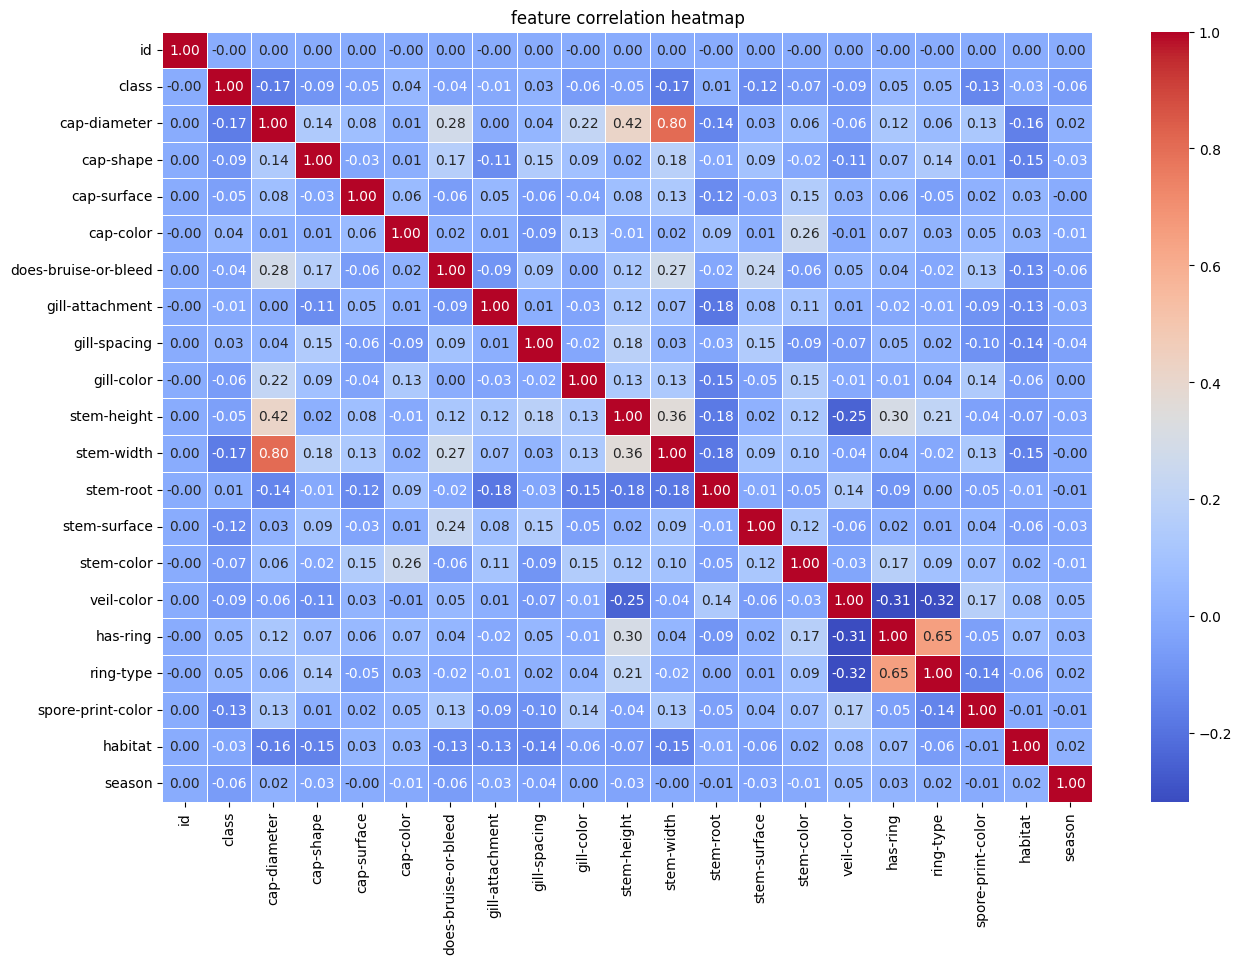

In [32]:
corr_matrix=scaled_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("feature correlation heatmap")
plt.show()

**from this correlation matrix that the intensity of color reflects the strength of this linear relationship**

3.box plot for distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


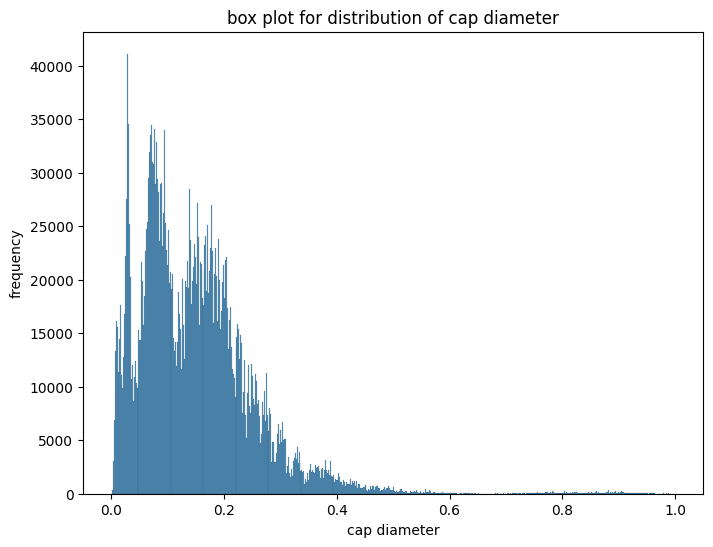

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(scaled_data["cap-diameter"])
plt.title("box plot for distribution of cap diameter")
plt.xlabel("cap diameter")
plt.ylabel("frequency")
plt.show()

**from this graph we understand that the majority of the mushroom in the dataset have a small cap diameter.**

3.distribution of target variable

class
1.0    1705396
0.0    1411549
Name: count, dtype: int64


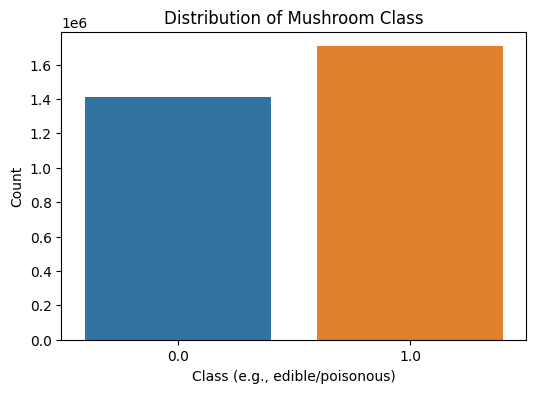

In [38]:

print(scaled_data['class'].value_counts())

# Bar chart of 'class'
plt.figure(figsize=(6, 4))
sns.countplot(data=scaled_data, x='class')
plt.title('Distribution of Mushroom Class')
plt.xlabel('Class (e.g., edible/poisonous)')
plt.ylabel('Count')
plt.show()

**from this graph the 'poisonous class' has a notably larger representation than the 'edible class'**

4.relationship between columns

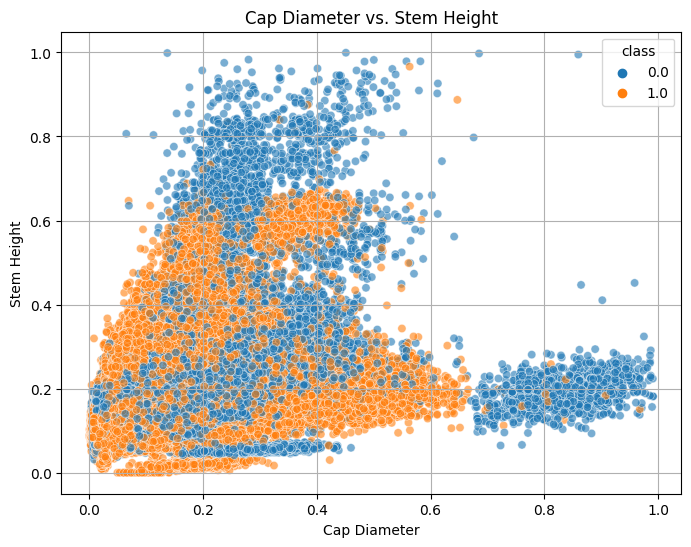

In [41]:
scaled_sample=scaled_data.sample(frac=0.1,random_state=42)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_sample, x='cap-diameter', y='stem-height',hue='class',alpha=0.6)
plt.title('Cap Diameter vs. Stem Height')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Height')
plt.legend(title='class')
plt.grid(True)
plt.show()


**here,the colour differentiation reveals distinct patterns bettween mushroom classes and their dimensions**

5.Q-Q plot for 'stem height'

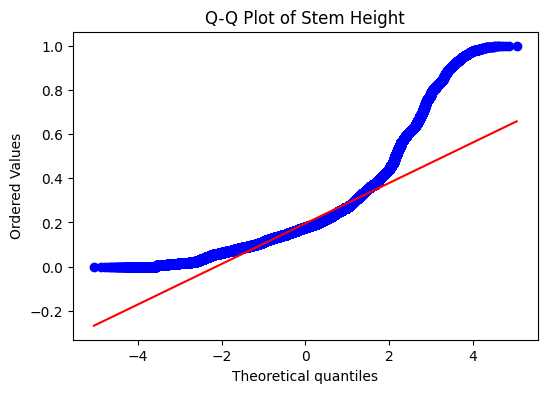

In [43]:
import scipy.stats as stats
plt.figure(figsize=(6, 4))
stats.probplot(scaled_data['stem-height'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Stem Height')
plt.show()


**the distribution of stem height is the normal distribution**